In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2

In [2]:
data=pd.read_csv('titanic.csv')
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
label=LabelEncoder()
data['Sex']=label.fit_transform(data['Sex'])
data['Embarked']=label.fit_transform(data['Embarked'])
x=data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y=data['Survived']

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)

In [5]:
def train_model(layers,regularization=None,noise=None):
    model=tf.keras.Sequential(layers)
    if regularization:
        for layer in model.layers[:-1]:
            layer.kernel_regularizer=regularization
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    history=model.fit(x_train,y_train,epochs=100,verbose=0,callbacks=[early_stopping],validation_split=0.2,batch_size=32)
    return model,history

In [6]:
dense=Dense(64,activation='relu')
l1_reg=l1(0.01)
l2_reg=l2(0.01)
dropout=Dropout(0.2)
noise_layer=GaussianNoise(0.1)

In [7]:
architechtures={
    "regular":[dense,dense,Dense(1,activation='sigmoid')],
    "l1 regularization":[dense,dense,Dense(1,activation='sigmoid',kernel_regularizer=l1_reg)],
    "l2 regularization":[dense,dense,Dense(1,activation='sigmoid',kernel_regularizer=l2_reg)],
    "dropout":[dense,dropout,dense,dropout,Dense(1,activation='sigmoid')],
    "noisy data":[noise_layer,dense,Dense(1,activation='sigmoid')],
    "augmented":[dense,dense,Dense(1,activation='sigmoid')]
}
result={}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


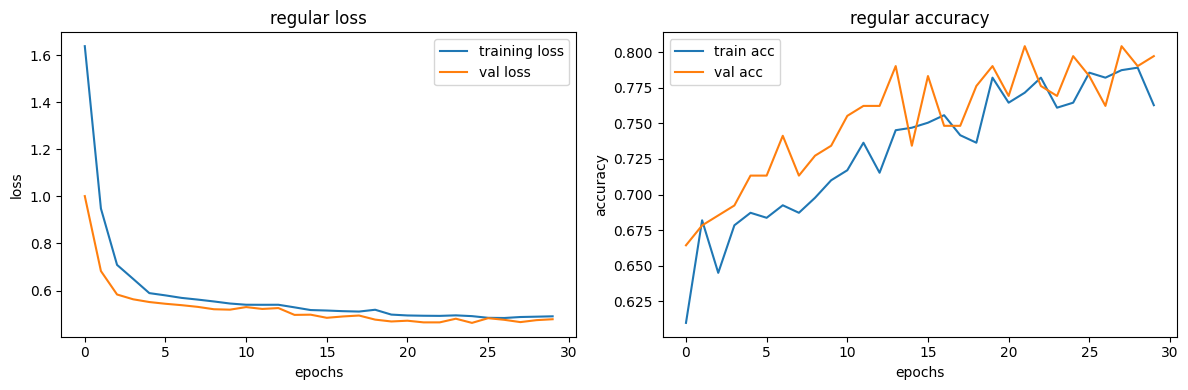

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


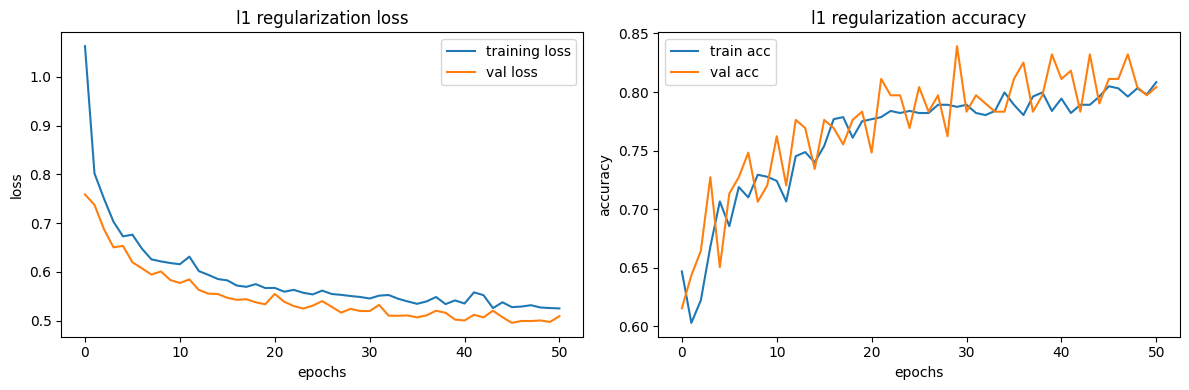

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


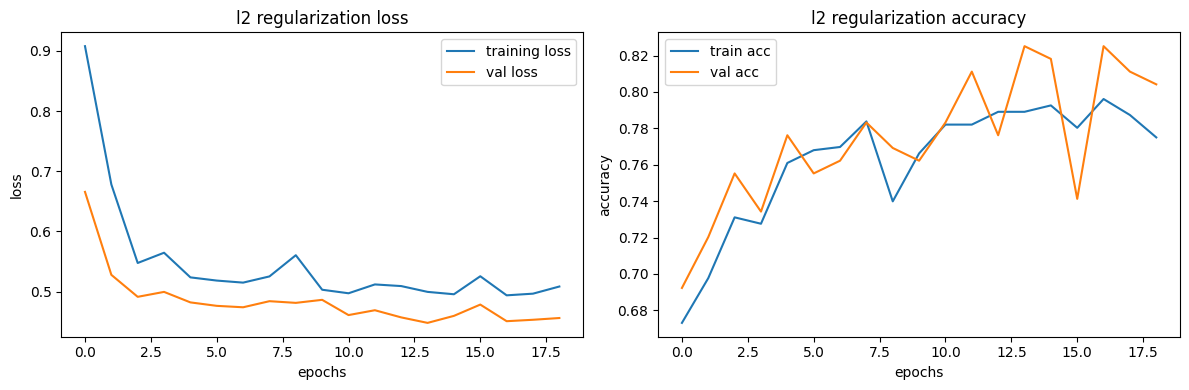

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


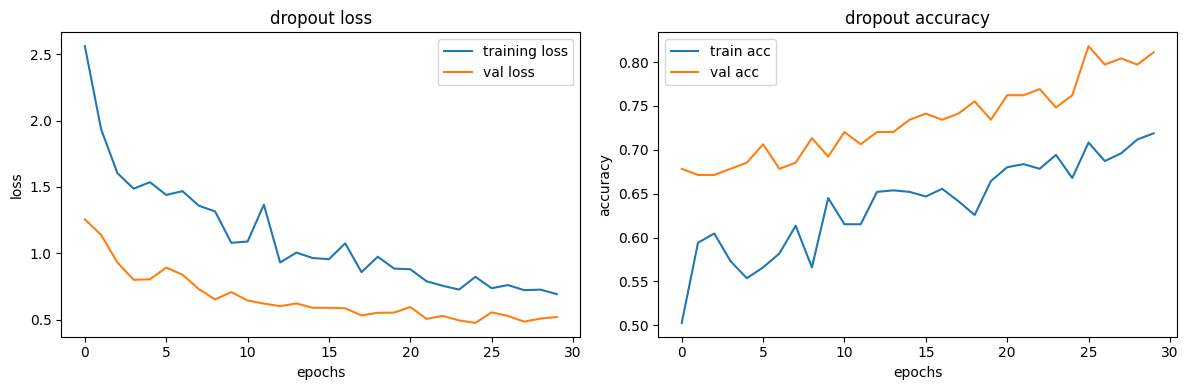

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNo  (None, 7)                 0         
 ise)                                                            
                                                                 
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


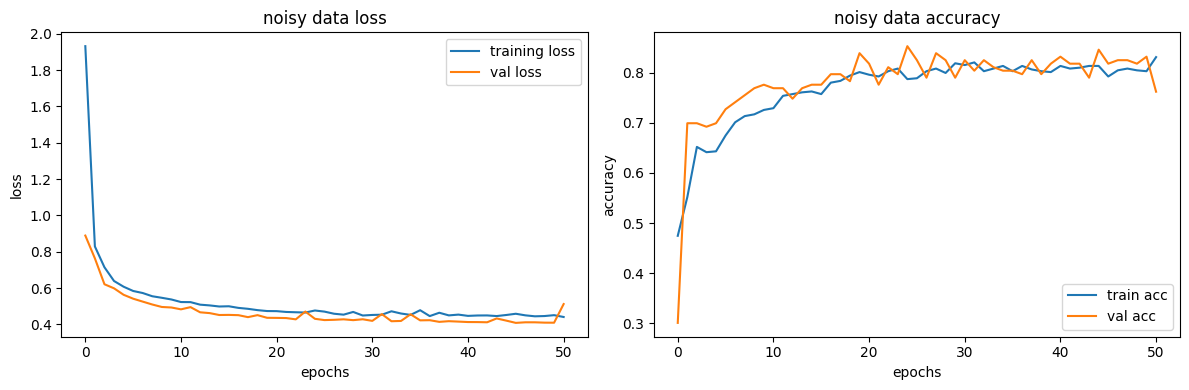

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


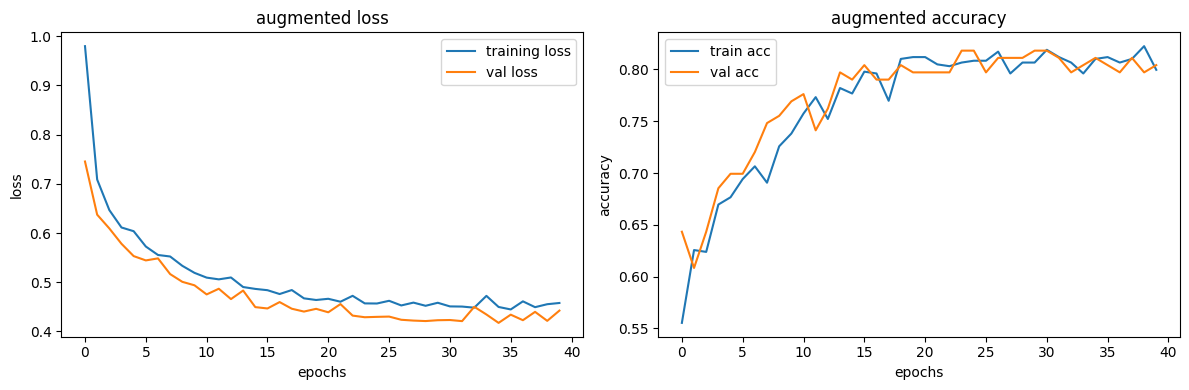

In [9]:
for name,layers in architechtures.items():
    model,history=train_model(layers)
    model.summary()
    loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],label='training loss')
    plt.plot(history.history['val_loss'],label='val loss')
    plt.title(f'{name} loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],label='train acc')
    plt.plot(history.history['val_accuracy'],label='val acc')
    plt.title(f'{name} accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    result[name]={'loss':loss,'accuracy':accuracy}

In [23]:
for name,res in result.items():
    print(name)
    print(f"loss :{res['loss']:.4f}")
    print(f"accuracy :{res['accuracy']:.4f}")
    print('*'*20)

regular
loss :0.4643
accuracy :0.7989
********************
l1 regularization
loss :0.5729
accuracy :0.7933
********************
l2 regularization
loss :0.4806
accuracy :0.7709
********************
dropout
loss :0.5332
accuracy :0.7709
********************
noisy data
loss :0.4595
accuracy :0.7821
********************
augmented
loss :0.4659
accuracy :0.7709
********************
